<a href="https://colab.research.google.com/github/LucasfrLourenco/Trabalho_Titanic/blob/main/TrabalhoTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [9]:
def show_box(value):
  sns.set(font_scale=2)
  sns.heatmap([[value]], annot=True)
  sns.set(font_scale=1)


In [10]:
#Importando os arquivos train e test .csv com pandas
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## **Visualização de Dados Inicial**

In [11]:
#Exibindo os tipos de dados que tem no nosso conjunto
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
#Tamanho dos Dados
df_train.shape

(891, 12)

In [13]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
#Resumo de dados estatísticos
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
#Verificando se há algum dado duplicado no conjunto
df_train.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [16]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Estamos printando esses dados para sabermos se dentro do nosso conjunto tem algum tipo de dado que são nulos, como por exemplo a coluna: Embarked, Cabin, Age

In [17]:
#Porcentagem de valores em branco nas colunas
null_percent = (df_train.isnull().sum() / len(df_train)).sort_values(ascending=False) * 100.0
null_percent

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

Como o valor de passageiros que não possuem uma cabine especifica é muito alta, vamos dropar a coluna de cabine, e além disso vamos retirar da nossa análise os passageiros que sobraram quem possuem uma cabine, para que esses dados não interfira nas nossas futuras análises

In [18]:
#Retirando coluna Cabine
df_train.drop('Cabin', axis='columns', inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [19]:
#Retirando passageiros associados a uma cabine
df_train.dropna(subset=['Embarked'], inplace=True)
(df_train.isnull().sum() / len(df_train)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.910011
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
dtype: float64

# **Análise Explorátoria - Idade e Sexo**

In [20]:
#Média geral das idades dos passageiros
media_idade = df_train['Age'].mean().round(2)
print('Média idade geral', media_idade)

Média idade geral 29.64


In [21]:
#Média das idades femininas
media_idade_feminina = df_train.loc[df_train['Sex'] =="female", 'Age'].mean().round(2)
print('Média idade feminina', media_idade_feminina)

Média idade feminina 27.75


In [22]:
#Média das idades masculinas
media_idade_masculina = df_train.loc[df_train['Sex'] =="male", 'Age'].mean().round(2)
print('Média idade masculina', media_idade_masculina)

Média idade masculina 30.73


In [23]:
#Média das idades crianças
media_idade_criancas = df_train.loc[df_train['Age'] <= 12, 'Age'].mean().round(2)
print('Média idade das crianças', media_idade_criancas)

Média idade das crianças 4.77


[Text(0, 0, 'Masculino'), Text(1, 0, 'Feminino')]

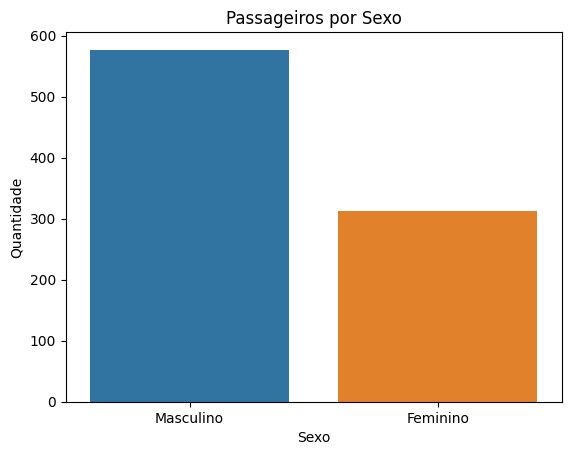

In [24]:
#Gráfico quantidade passageiros por sexo
count_sex_graph = sns.countplot(data=df_train, x='Sex')
count_sex_graph.set_ylabel('Quantidade')
count_sex_graph.set_xlabel('Sexo')
count_sex_graph.set_title('Passageiros por Sexo')


count_sex_graph.set_xticklabels(["Masculino", "Feminino"])


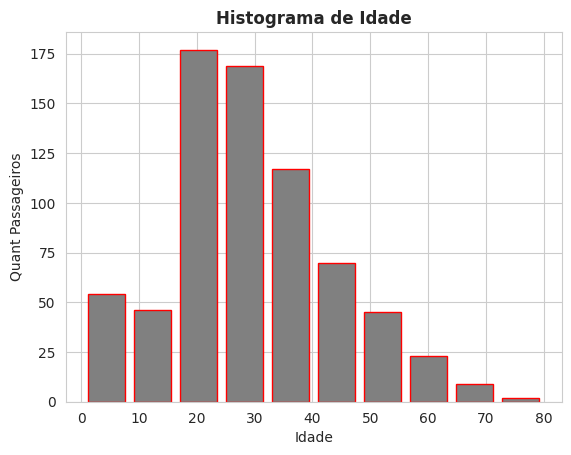

In [25]:
sns.set_style("whitegrid")

plt.hist(df_train.Age, rwidth=0.8, ec='r', color='gray')

plt.xlabel('Idade')
plt.ylabel('Quant Passageiros')
plt.title('Histograma de Idade', fontweight='bold')

plt.show()

Text(0.5, 1.0, 'Idade por Sexo Feminino')

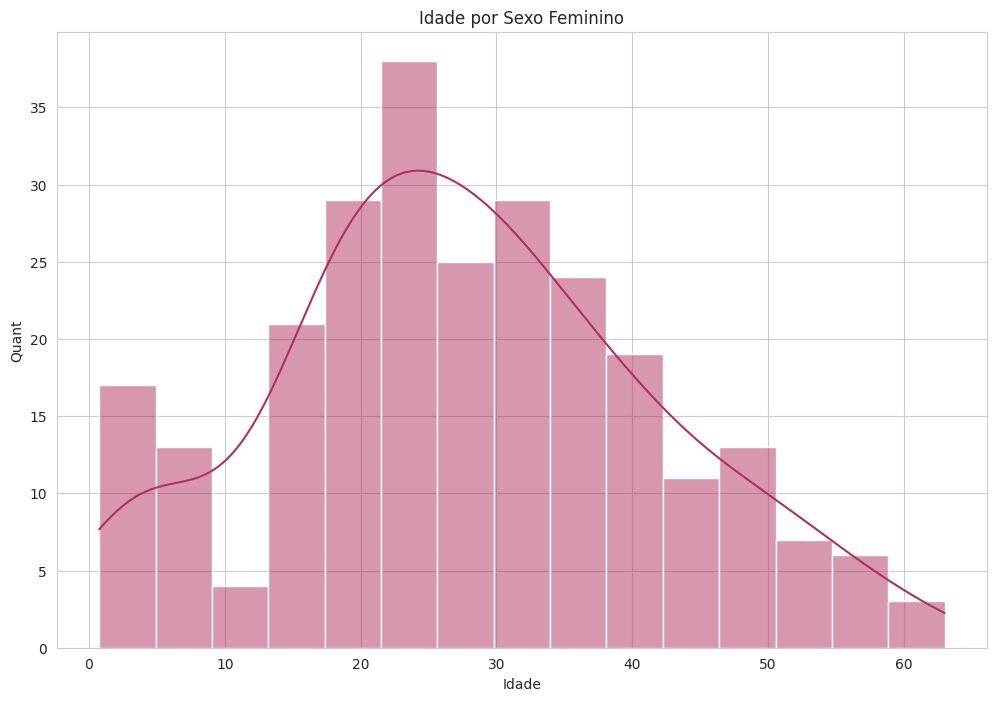

In [26]:
plt.subplots(figsize=(12, 8))

hm = sns.histplot(data=df_train.loc[(df_train['Sex'] == 'female')], x='Age', bins=15, kde=True, color='#b03060')
hm.set_xlabel('Idade')
hm.set_ylabel('Quant')
hm.set_title('Idade por Sexo Feminino')

Text(0.5, 1.0, 'Idade por Sexo Masculino')

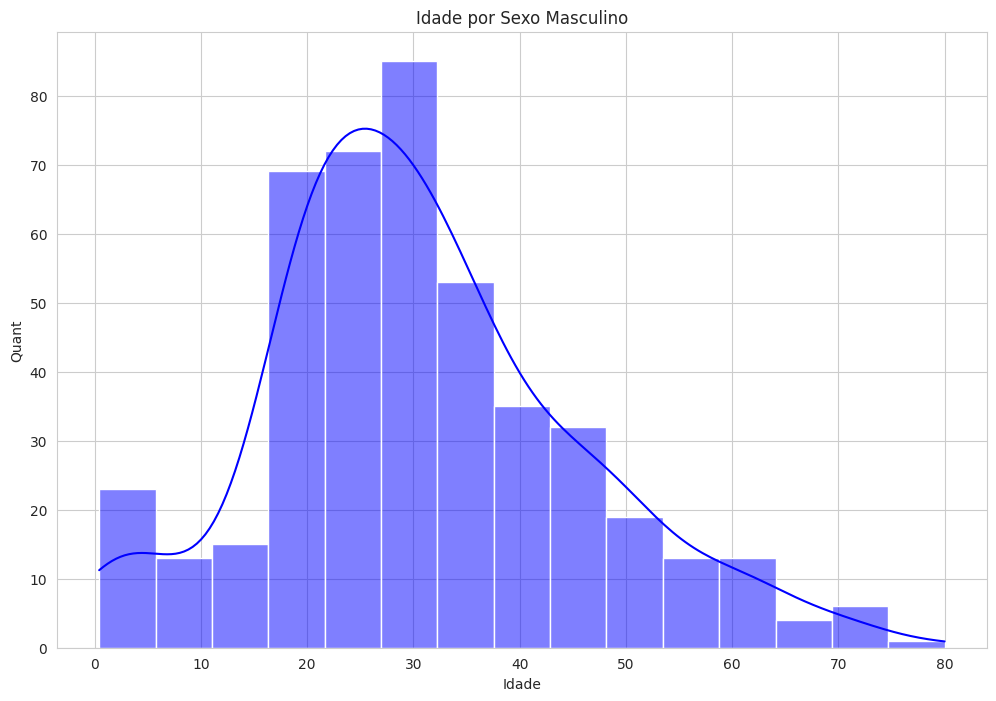

In [27]:
plt.subplots(figsize=(12, 8))

hf = sns.histplot(data=df_train.loc[(df_train['Sex'] == 'male')], x='Age', bins=15, kde=True, color='blue')
hf.set_xlabel('Idade')
hf.set_ylabel('Quant')
hf.set_title('Idade por Sexo Masculino')

Agora com alguns graficos de Idade e Sexo feitos, vamos tentar fazer algumas correlaçoes com a sobrevivência dos passageiros com esses dados obtidos

Text(0, 0.5, 'Quant')

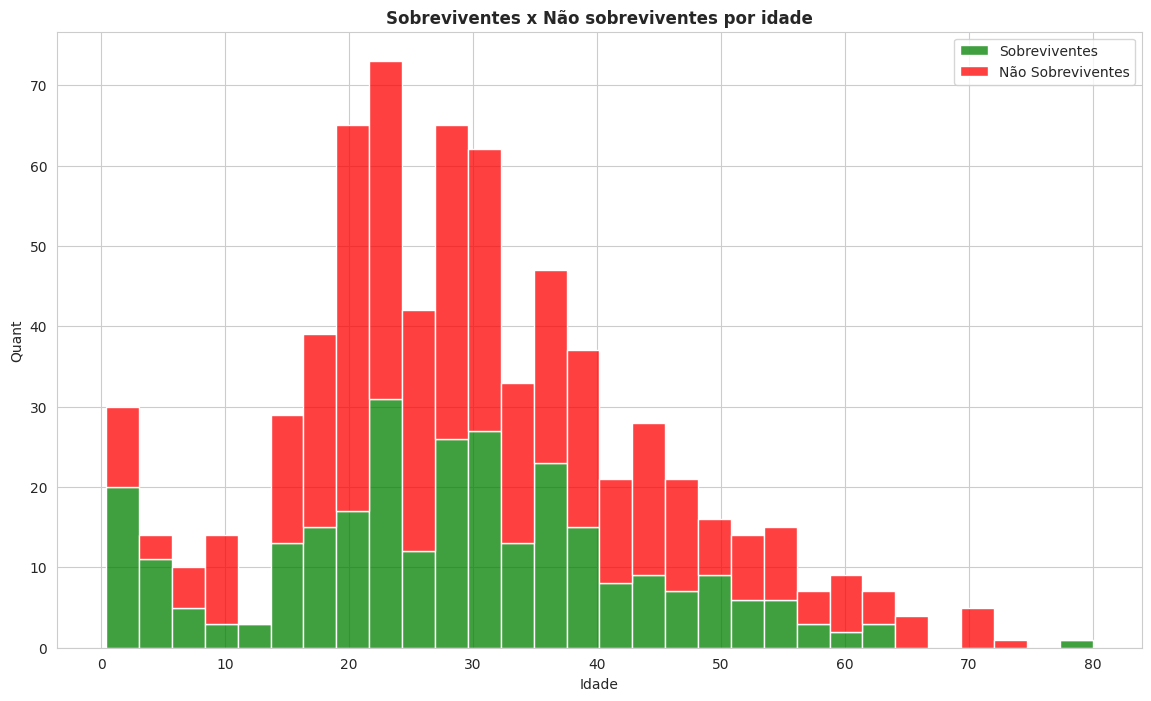

In [28]:
plt.subplots(figsize=(14, 8))

hSurvived = sns.histplot(data=df_train, x='Age', hue='Survived', multiple='stack', bins=30, palette=['r', 'g'])

hSurvived.set_title('Sobreviventes x Não sobreviventes por idade', fontweight='bold')
hSurvived.legend(['Sobreviventes', 'Não Sobreviventes'])
hSurvived.set_xlabel('Idade')
hSurvived.set_ylabel('Quant')


Podemos notar que as crianças de pouca idade tiveram uma maior taxa de sobrevivência, por possivelmente eles terem tentado salvar as crianças primeiramente

Text(0.5, 1.0, 'Sobreviventes x Não sobreviventes por sexo')

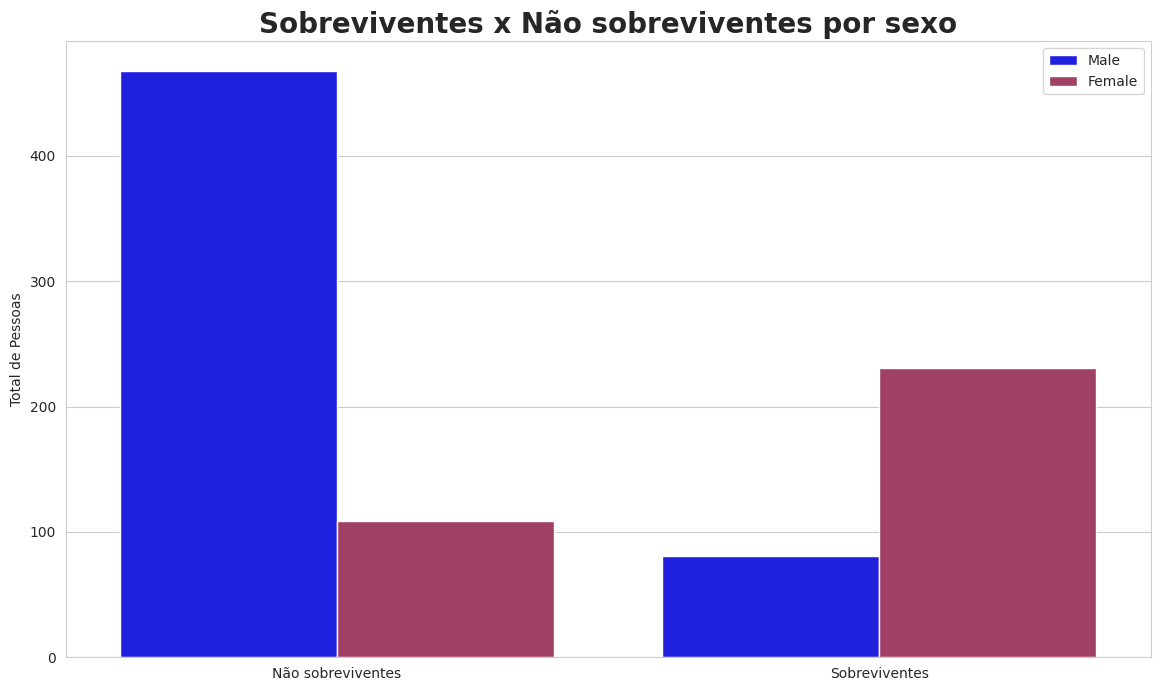

In [29]:

plt.subplots(figsize=(14, 8))

hSexSurvived = sns.countplot(data=df_train, x='Sex', hue = df_train['Survived'], palette=['b', '#b03060'])
hSexSurvived.set(ylabel="Total de Pessoas", xlabel='', xticklabels=["Não sobreviventes", "Sobreviventes"])
hSexSurvived.legend(['Male', 'Female'])
plt.title('Sobreviventes x Não sobreviventes por sexo', fontsize=20, fontweight='bold')



Com esse grafico podemos concluir que a taxa de sobrevivência das mulheres foi muito maior do que comparado com os homens

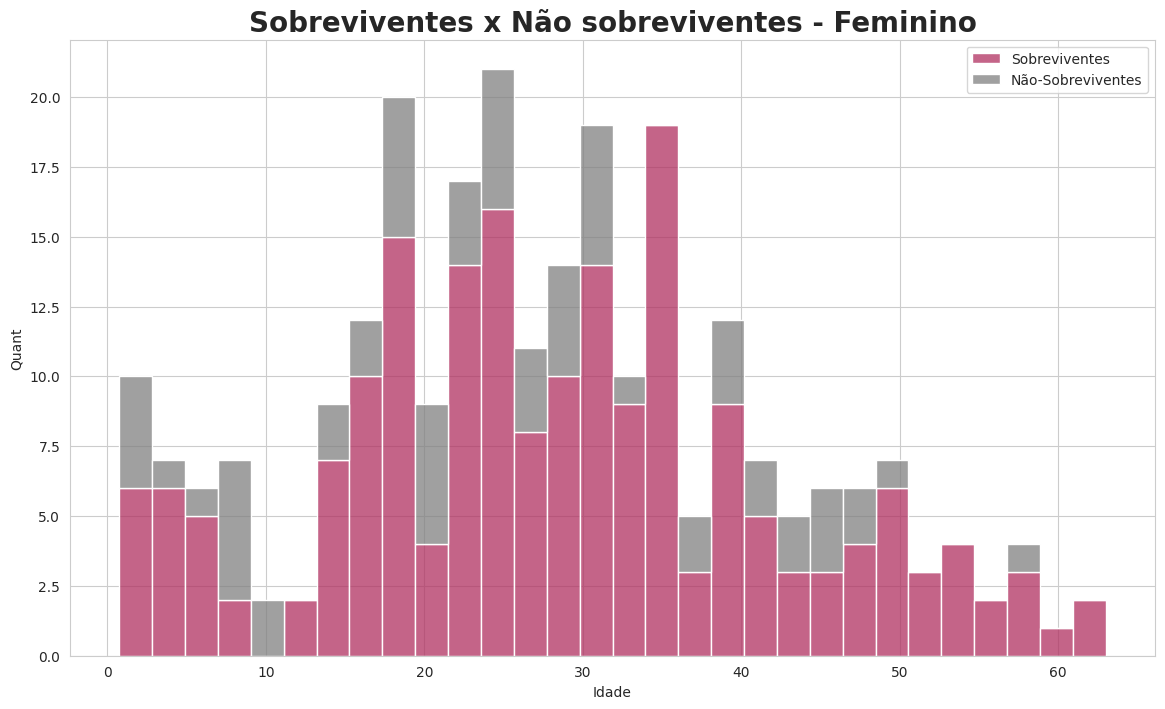

In [30]:
figure = plt.subplots(figsize=(14, 8))

hFemale = sns.histplot(data=df_train.loc[df_train['Sex'] == 'female'], x='Age', hue='Survived', multiple='stack', bins=30, palette=['gray', '#b03060'])

hFemale.set_xlabel('Idade')
hFemale.set_ylabel('Quant')

hFemale.set_title('Sobreviventes x Não sobreviventes - Feminino', fontsize=20, fontweight='bold')
hFemale.legend(['Sobreviventes', 'Não-Sobreviventes'])



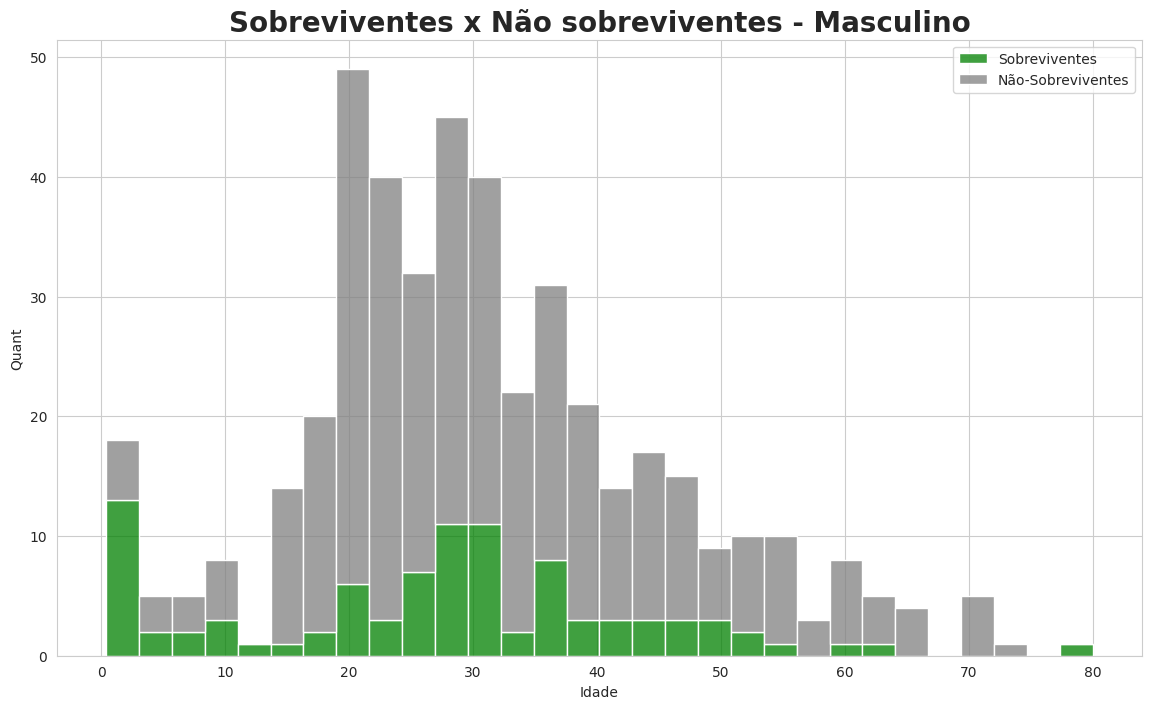

In [31]:
figure = plt.subplots(figsize=(14, 8))

hMale = sns.histplot(data=df_train.loc[df_train['Sex'] == 'male'], x='Age', hue='Survived', multiple='stack', bins=30, palette=['gray', 'g'])

hMale.set_xlabel('Idade')
hMale.set_ylabel('Quant')

hMale.set_title('Sobreviventes x Não sobreviventes - Masculino', fontsize=20, fontweight='bold')
hMale.legend(['Sobreviventes', 'Não-Sobreviventes'])

Como vimos anteriormente a taxa de mulheres que sobreviveram ao naufrágio é muito maior que a dos homens, além disso podemos ver que a maior taxa de sobrevivência masculina são as crianças menores

<Figure size 1400x800 with 0 Axes>

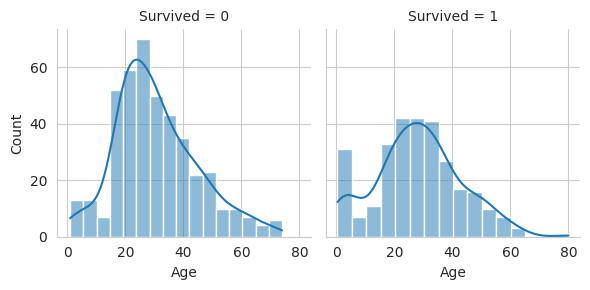

In [32]:
plt.figure(figsize=(14, 8))

age_survived = sns.FacetGrid(df_train, col='Survived')
age_survived.map(sns.histplot, 'Age', kde=True)




Mais um grafico para comprovar que as crianças menores tem uma taxa de sobrevivência maior, nesse gráfico podemos ver que se tem um pico de sobreviventes na faixa de idade das crianças

# Pclass

Text(0, 0.5, 'Quant')

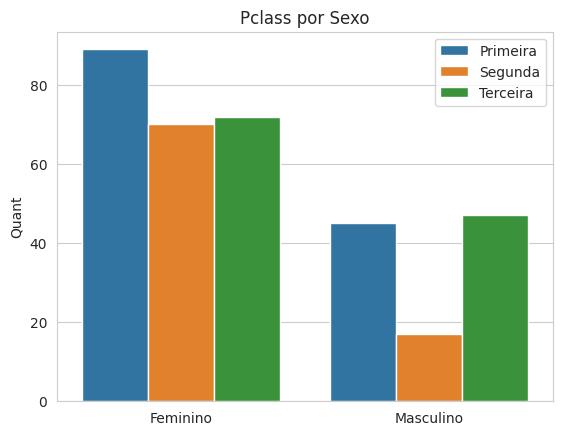

In [33]:
hP = sns.countplot(data=df_train.loc[df_train['Survived'] == 1] , x='Sex', hue='Pclass')
hP.set_title('Pclass por Sexo')
hP.legend(['Primeira', 'Segunda','Terceira'])

hP.set_xticklabels(["Feminino", "Masculino"])

hP.set_xlabel('')
hP.set_ylabel('Quant')

[Text(0, 0, 'Primeira Classe'),
 Text(1, 0, 'Segunda Classe'),
 Text(2, 0, 'Terceira Classe')]

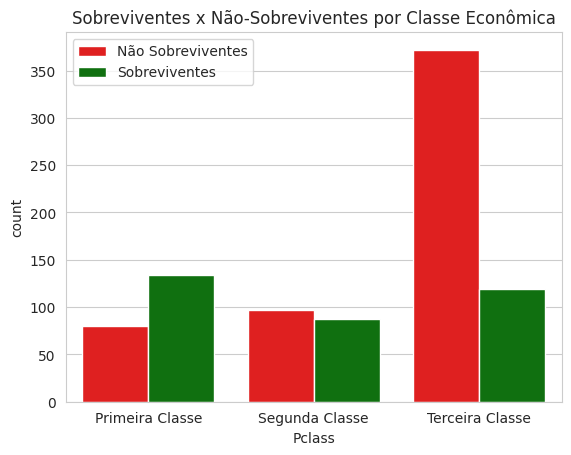

In [34]:
hPclass = sns.countplot(data=df_train, x='Pclass', hue='Survived', palette=['r','g'])
hPclass.set_title('Sobreviventes x Não-Sobreviventes por Classe Econômica')
hPclass.legend(['Não Sobreviventes', 'Sobreviventes'])

hPclass.set_xticklabels(['Primeira Classe', 'Segunda Classe', 'Terceira Classe'])


Aqui conseguimos ver através do grafico a diferença entre sobreviventes da primeira e terceira classe, obviamente que tem menos passageiros de primeira classe, mas mesmo assim tem mais sobreviventes da primeira classe do que sobreviventes da terceira

### Pclass x Idade

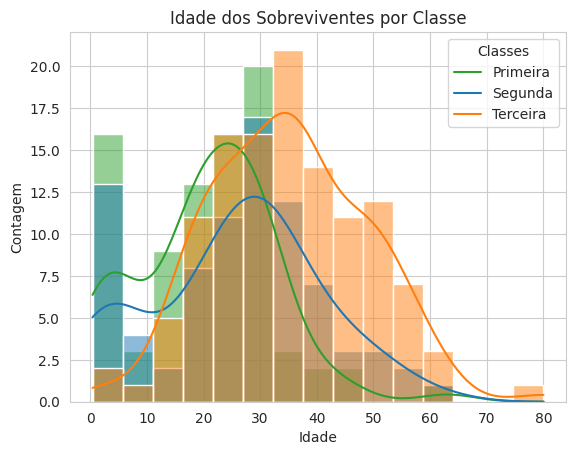

In [35]:
# Filtrando os dados para sobreviventes das três classes
df_survived = df_train[df_train['Survived'] == 1]
df_survived_classes = df_survived[df_survived['Pclass'].isin([1, 2, 3])]

#Criando uma paleta de cor
cores = ['#FF7F0E', '#1F77B4', '#2CA02C']

sns.histplot(data=df_survived_classes, x='Age', hue='Pclass', bins=15, kde=True, palette=cores)

plt.title('Idade dos Sobreviventes por Classe')
plt.xlabel('Idade')
plt.ylabel('Contagem')

legend_labels = ['Primeira', 'Segunda', 'Terceira']
plt.legend(title='Classes', labels=legend_labels)

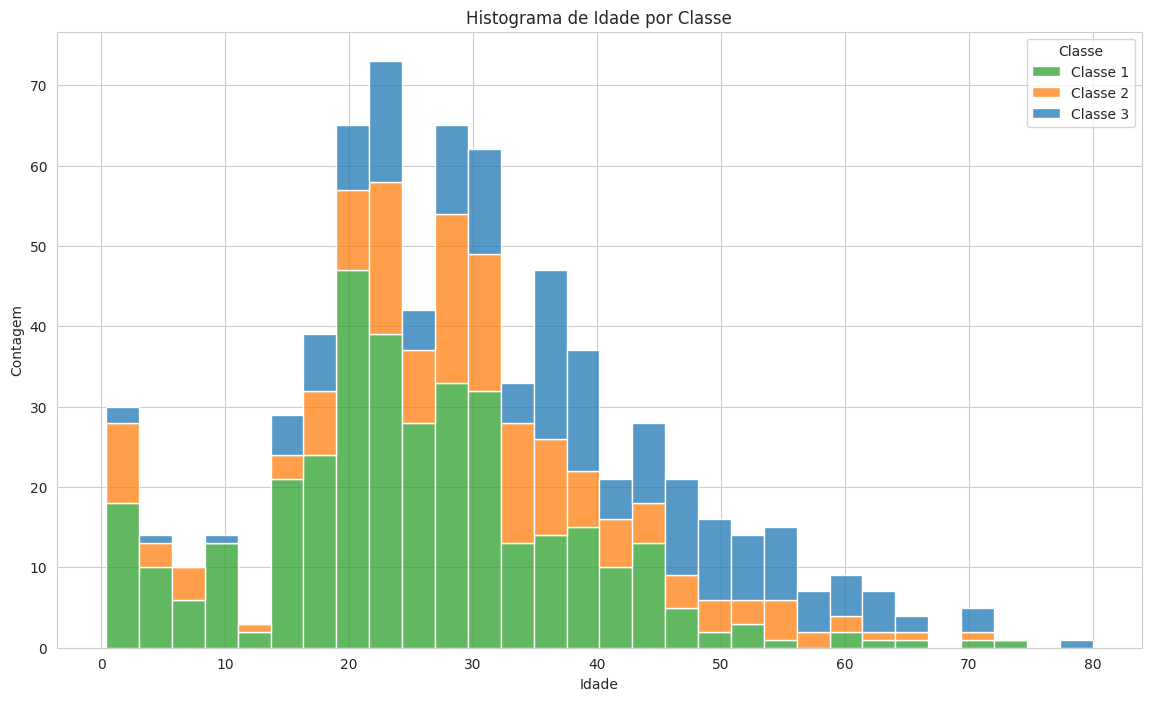

In [36]:
plt.figure(figsize=(14, 8))

cores = ['#1F77B4', '#FF7F0E', '#2CA02C']  # Azul, Laranja, Verde

sns.histplot(data=df_train, x='Age', hue='Pclass', multiple='stack', bins=30, palette=cores)

plt.title('Histograma de Idade por Classe')
plt.xlabel('Idade')
plt.ylabel('Contagem')

plt.legend(title='Classe', labels=['Classe 1', 'Classe 2', 'Classe 3'])




## Local de Embarque

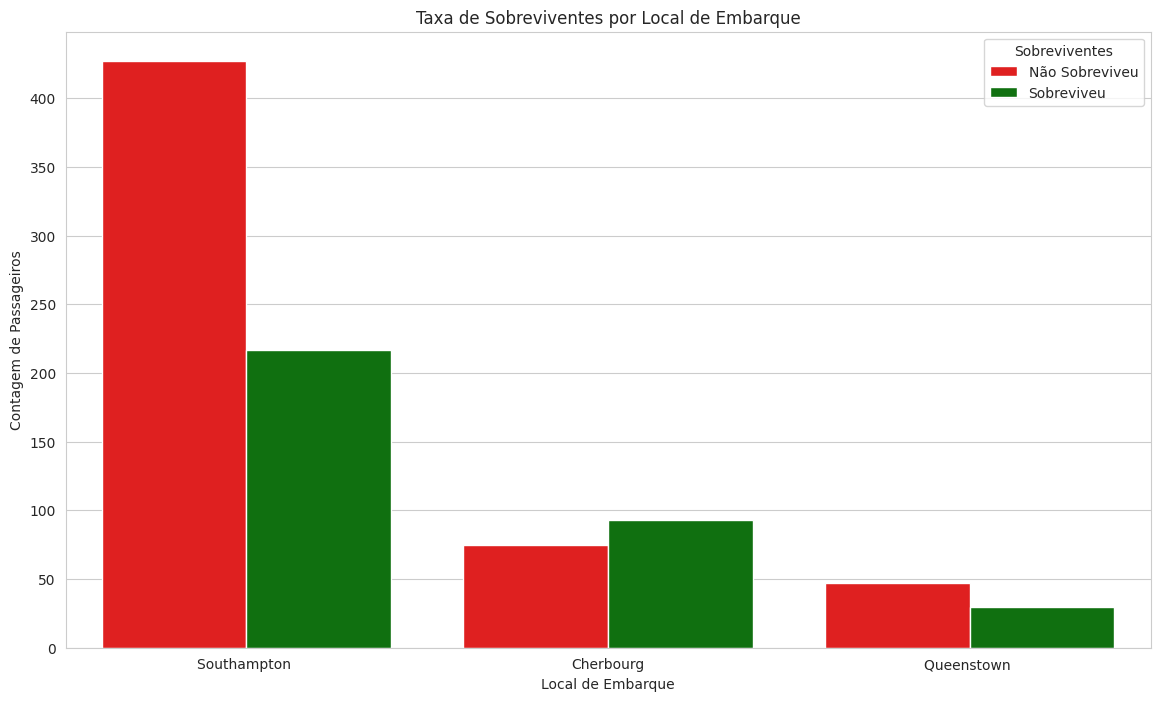

In [37]:
plt.figure(figsize=(14, 8))

sns.countplot(data=df_train, x='Embarked', hue='Survived', palette=(['red','g']))

plt.title('Taxa de Sobreviventes por Local de Embarque')
plt.xlabel('Local de Embarque')
plt.ylabel('Contagem de Passageiros')
plt.legend(title='Sobreviventes', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.xticks([0, 1, 2], ['Southampton ', 'Cherbourg', 'Queenstown '])

plt.show()


Um grafico que mostra a taxa de sobrevivência dos passageiros comparado pelo local de embarque, podemos ver que tiveram mais sobreviventes do que mortos para aqueles que embarcaram em Cherbourg

## Preço do Ticket

([<matplotlib.axis.XTick at 0x7fbc1483d120>,
 [Text(0, 0, 'Não Sobreviventes'), Text(1, 0, 'Sobreviventes')])

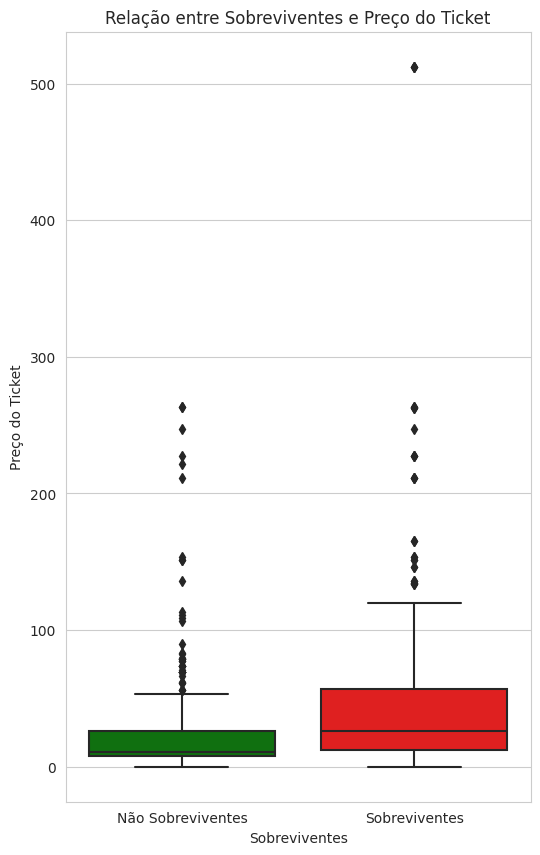

In [38]:
plt.figure(figsize=(6, 10))

sns.boxplot(data=df_train, x='Survived', y='Fare', palette=['g','r'])

plt.title('Relação entre Sobreviventes e Preço do Ticket')
plt.xlabel('Sobreviventes')
plt.ylabel('Preço do Ticket')

plt.xticks([0, 1], ['Não Sobreviventes', 'Sobreviventes'])



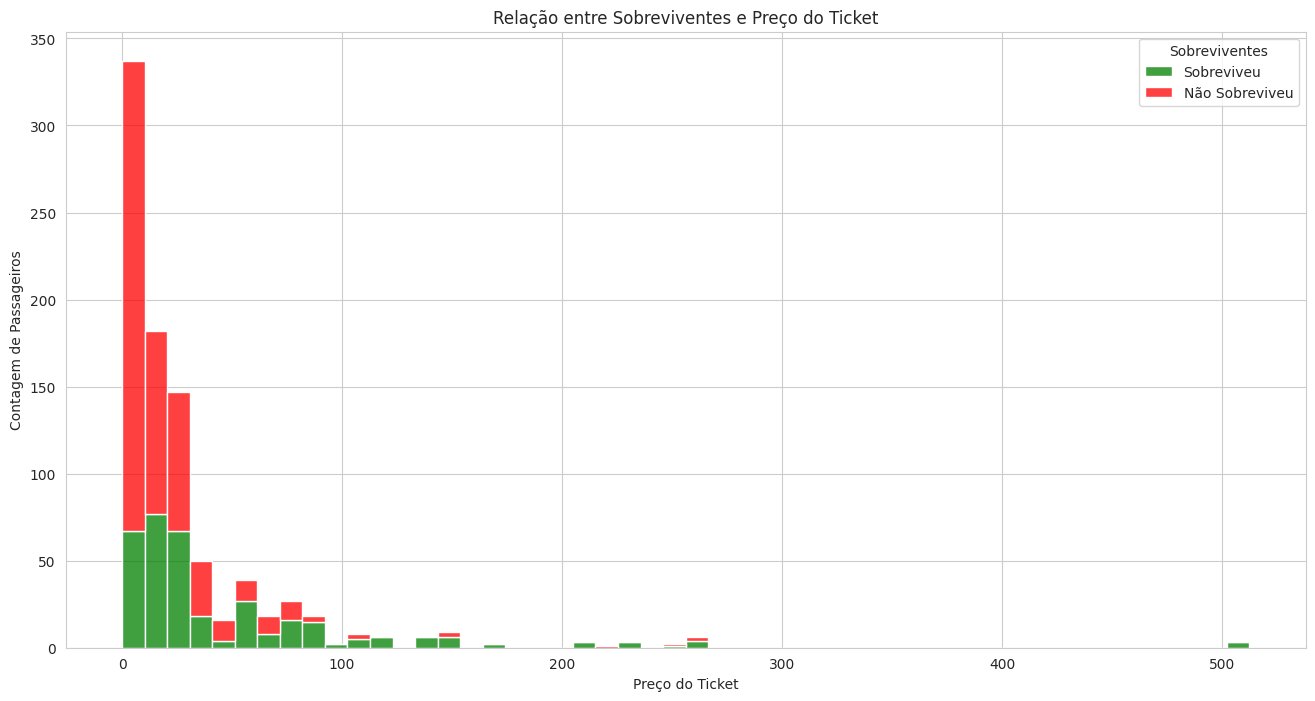

In [39]:
plt.figure(figsize=(16, 8))

sns.histplot(data=df_train, x='Fare', hue='Survived', bins = 50, multiple='stack', palette=['r','g'])

plt.title('Relação entre Sobreviventes e Preço do Ticket')
plt.xlabel('Preço do Ticket')
plt.ylabel('Contagem de Passageiros')

plt.legend(title='Sobreviventes', labels=['Sobreviveu', 'Não Sobreviveu'])

plt.show()


Aqui vemos 2 graficos, um boxplot e um histograma que podemos analisar e chegar a conclusão que os passageiros que pagaram pelo ticket de maior valor teve uma taxa de sobrevivência mais alta do que os outros.

A maioria da pessoas pagaram pelo ticket de valor entre 0 e 30.

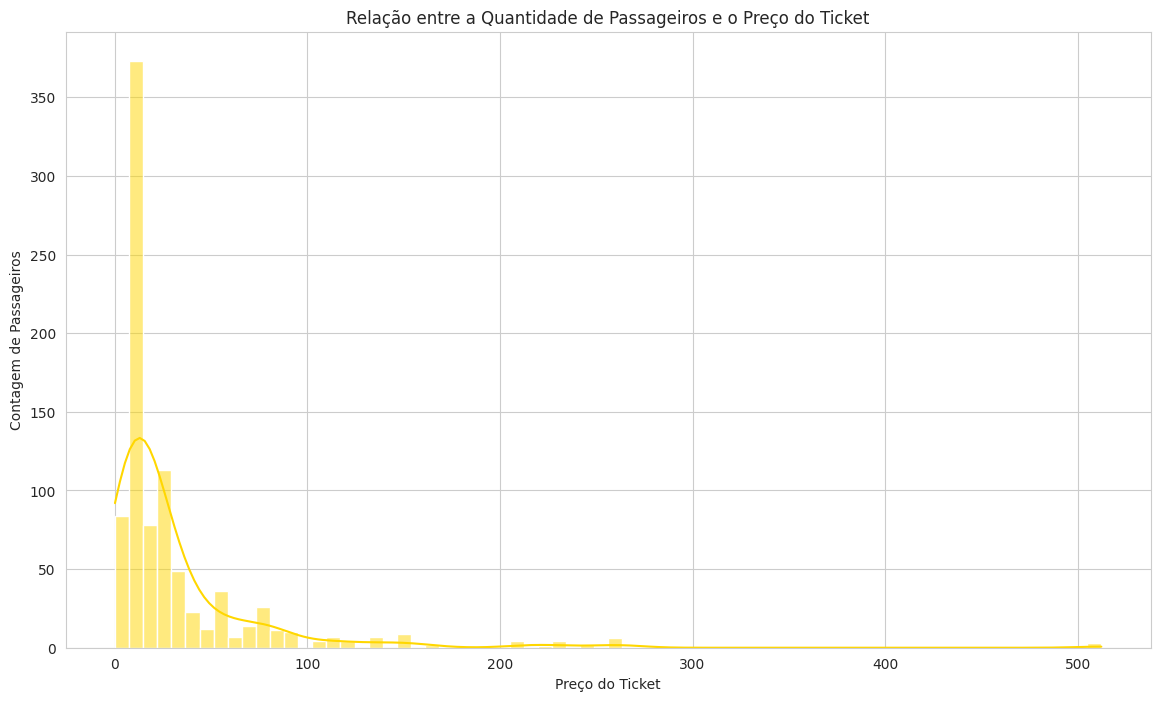

In [40]:
plt.figure(figsize=(14, 8))
sns.histplot(data=df_train, x='Fare', bins=70, kde=True, color='gold')
plt.title('Relação entre a Quantidade de Passageiros e o Preço do Ticket')
plt.xlabel('Preço do Ticket')
plt.ylabel('Contagem de Passageiros')
plt.show()


Mostrando a variação da quantidade de pessoa por preço do ticket pagado

# **Machine Learning**

In [41]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [42]:
X = df_train[['Pclass', 'Sex', 'Age', 'Fare']]
y = df_train['Survived']

In [43]:
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
X['Age'].fillna(X['Age'].mean(), inplace=True)

<ipython-input-43-4ea4407534a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
<ipython-input-43-4ea4407534a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

In [45]:
arvoreDecisao = DecisionTreeClassifier()

In [46]:
arvoreDecisao.fit(X_train, y_train)


DecisionTreeClassifier()

In [47]:
y_pred = arvoreDecisao.predict(X)


In [48]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [49]:
df_train['Sobreviveu'] = y_pred
df_train[['PassengerId','Sobreviveu']]

,PassengerId,Sobreviveu
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


In [50]:
df_train['Sobreviveu'].value_counts()

0    561
1    330
Name: Sobreviveu, dtype: int64

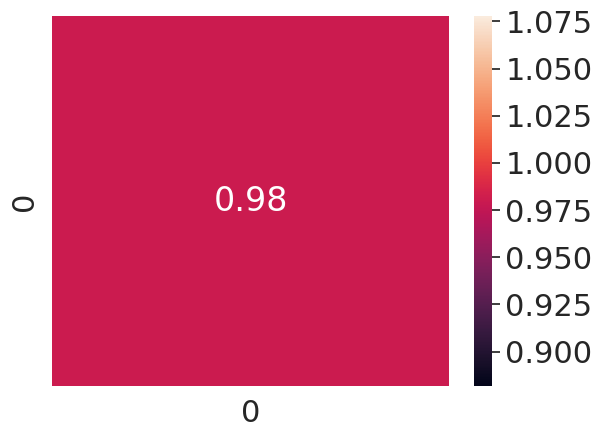

In [51]:
accuracyDT = accuracy_score(y, y_pred)
show_box(accuracyDT)

# Random Forest

In [52]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [53]:
X = df_train[['Pclass', 'Sex', 'Age', 'Fare']]
y = df_train['Survived']

In [54]:
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
X['Age'].fillna(X['Age'].mean(), inplace=True)

<ipython-input-54-4ea4407534a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
<ipython-input-54-4ea4407534a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1, random_state=42)

In [56]:
randomForest = RandomForestClassifier()

In [57]:
randomForest.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
y_pred = randomForest.predict(X)

In [59]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [60]:
df_train['Sobreviveu'] = y_pred
df_train[['PassengerId','Sobreviveu']]

,PassengerId,Sobreviveu
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


In [61]:
df_train['Sobreviveu'].value_counts()

0    553
1    338
Name: Sobreviveu, dtype: int64

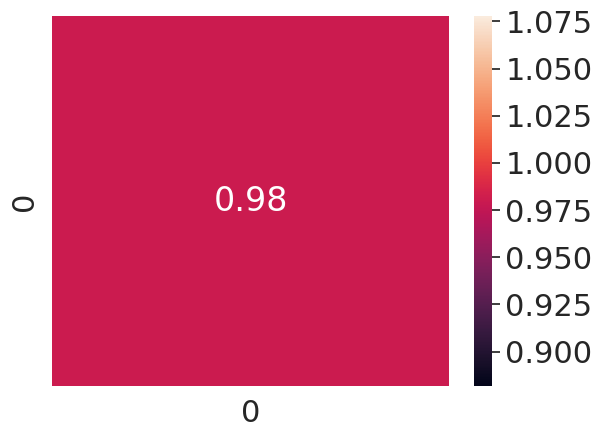

In [62]:
accuracyRF = accuracy_score(y, y_pred)
show_box(accuracyRF)

# Regressão Linear

In [63]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [64]:
X = df_train[['Age', 'Sex', 'Fare','Pclass']]
y = df_train['Survived']

In [65]:
X.isnull().value_counts()

Age    Sex    Fare   Pclass
False  False  False  False     714
True   False  False  False     177
dtype: int64

In [66]:
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
X['Age'].fillna(X['Age'].mean(), inplace=True)

<ipython-input-66-4ea4407534a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
<ipython-input-66-4ea4407534a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
regressao_linear = LogisticRegression()

In [69]:
regressao_linear.fit(X, y)

LogisticRegression()

In [70]:
y_pred = regressao_linear.predict(X)

In [71]:
df_train['Sobreviveu'] = y_pred

In [72]:
df_train[['PassengerId','Sobreviveu']]

,PassengerId,Sobreviveu
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,1
889,890,1


In [73]:
df_train['Sobreviveu'].value_counts()

0    567
1    324
Name: Sobreviveu, dtype: int64

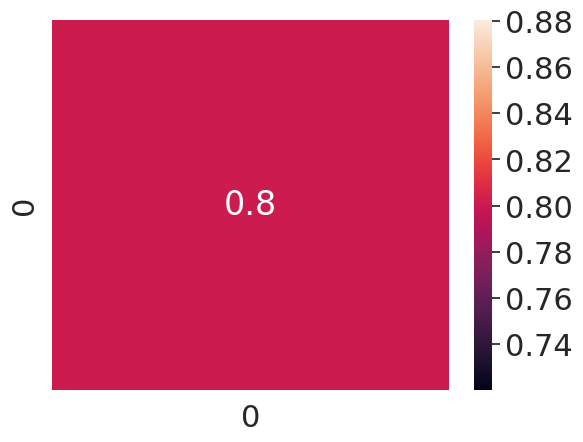

In [74]:
accuracyLR = accuracy_score(y, y_pred)
show_box(accuracyLR)

In [75]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sobreviveu
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [76]:
df_train.loc[(df_train['Sex'] == 'male') & (df_train['Sobreviveu'] == 1)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sobreviveu
count,24.000000,24.000000,24.0,22.000000,24.000000,24.000000,24.000000,24.0
mean,454.208333,0.541667,1.0,22.087273,0.458333,0.666667,149.865625,1.0
std,261.100344,0.508977,0.0,8.432361,0.721060,0.868115,131.282663,0.0
min,28.000000,0.000000,1.0,0.920000,0.000000,0.000000,30.000000,1.0
25%,264.500000,0.000000,1.0,19.000000,0.000000,0.000000,73.386475,1.0
50%,495.500000,1.000000,1.0,24.000000,0.000000,0.000000,99.989600,1.0
75%,680.500000,1.000000,1.0,27.000000,1.000000,1.250000,214.069800,1.0
max,890.000000,1.000000,1.0,36.000000,3.000000,2.000000,512.329200,1.0


In [77]:
df_train.loc[(df_train['Sex'] == 'female') & (df_train['Sobreviveu'] == 1)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sobreviveu
count,300.000000,300.000000,300.000000,247.000000,300.000000,300.000000,300.000000,300.0
mean,431.800000,0.770000,2.120000,27.024291,0.703333,0.560000,45.468154,1.0
std,256.481518,0.421536,0.857156,13.902788,1.177544,0.817697,59.094884,0.0
min,2.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000,1.0
25%,233.250000,1.000000,1.000000,18.000000,0.000000,0.000000,12.215625,1.0
50%,414.500000,1.000000,2.000000,26.000000,0.000000,0.000000,23.000000,1.0
75%,642.250000,1.000000,3.000000,35.000000,1.000000,1.000000,57.244800,1.0
max,889.000000,1.000000,3.000000,63.000000,8.000000,4.000000,512.329200,1.0


## Machine Learning com Hiperparâmetros

In [78]:
from sklearn.metrics import recall_score

In [79]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [80]:
X = df_train[['Pclass', 'Sex', 'Age', 'Fare']]
y = df_train['Survived']

In [81]:
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
X['Age'].fillna(X['Age'].mean(), inplace=True)

<ipython-input-81-4ea4407534a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
<ipython-input-81-4ea4407534a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(), inplace=True)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [83]:
arvoreDecisao = DecisionTreeClassifier(random_state=42)

In [84]:
hyperparameters= {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [85]:
hyperparameters_search = GridSearchCV(arvoreDecisao, hyperparameters, cv=5)
hyperparameters_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [86]:
best_hyperparameters = hyperparameters_search.best_params_

In [87]:
cross_val_scores_dt = cross_val_score(hyperparameters_search.best_estimator_, X_train, y_train, cv=5)

### Random Forest

In [88]:
randomForest = RandomForestClassifier(random_state=42)

In [89]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [90]:
hyperparameters_search_rf = GridSearchCV(randomForest, param_grid_rf, cv=5)
hyperparameters_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [91]:
best_hyperparameters_rf = hyperparameters_search_rf.best_params_

In [92]:
cross_val_scores_rf = cross_val_score(hyperparameters_search_rf.best_estimator_, X_train, y_train, cv=5)

In [93]:
linearRegression = LogisticRegression()

In [94]:
hyperparameters_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

In [95]:
hyperparameters_search_lr = GridSearchCV(linearRegression, hyperparameters_lr, cv=5)
hyperparameters_search_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [96]:
best_hyperparameters_lr = hyperparameters_search_lr.best_params_

In [97]:
cross_val_scores_lr = cross_val_score(hyperparameters_search_lr.best_estimator_, X_train, y_train, cv=5)

In [98]:
print("Árvore de Decisão - Validação Cruzada Scores:", cross_val_scores_dt)
print("Floresta Aleatória - Validação Cruzada Scores:", cross_val_scores_rf)
print("Regressão Logística - Validação Cruzada Scores:", cross_val_scores_lr)

Árvore de Decisão - Validação Cruzada Scores: [0.8        0.848      0.76       0.83064516 0.83064516]
Floresta Aleatória - Validação Cruzada Scores: [0.824      0.864      0.784      0.82258065 0.83870968]
Regressão Logística - Validação Cruzada Scores: [0.768      0.88       0.744      0.75806452 0.82258065]


In [99]:
modeloFinal_dt = hyperparameters_search.best_estimator_
modeloFinal_rf = hyperparameters_search_rf.best_estimator_
modeloFinal_lr = hyperparameters_search_lr.best_estimator_

In [100]:
y_pred_dt = modeloFinal_dt.predict(X_test)
y_pred_rf = modeloFinal_rf.predict(X_test)
y_pred_lr = modeloFinal_lr.predict(X_test)

In [101]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

In [102]:
print("Acurácia da Árvore de Decisão:", accuracy_dt)
print("Acurácia da Floresta Aleatória:", accuracy_rf)
print("Acurácia da Regressão Linear:", accuracy_lr)

Acurácia da Árvore de Decisão: 0.8134328358208955
Acurácia da Floresta Aleatória: 0.8059701492537313
Acurácia da Regressão Linear: 0.7985074626865671


In [103]:
recall_dt = recall_score(y_test, y_pred_dt)
recall_rf = recall_score(y_test, y_pred_rf)
recall_lr = recall_score(y_test, y_pred_lr)

In [104]:
print("Recall da Árvore de Decisão:", recall_dt)
print("Recall da Floresta Aleatória:", recall_rf)
print("Recall da Regressão Linear:", recall_lr)

Recall da Árvore de Decisão: 0.6936936936936937
Recall da Floresta Aleatória: 0.6486486486486487
Recall da Regressão Linear: 0.7207207207207207


In [105]:
df_test = pd.read_csv("test.csv")

In [106]:
X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]
X_test['Sex'] = X_test['Sex'].map({'female': 0, 'male': 1})
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)

<ipython-input-106-cdbb51eeac4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = X_test['Sex'].map({'female': 0, 'male': 1})
<ipython-input-106-cdbb51eeac4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)


In [107]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_test = imputer.fit_transform(X_test)



In [108]:
arvoreDecisao = DecisionTreeClassifier(random_state=42)


In [109]:
arvoreDecisao.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [110]:
y_pred_test = arvoreDecisao.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [111]:
df_submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred_test})


In [117]:
print(df_submission)


     PassengerId  Survived
0            892         0
1            893         0
2            894         1
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [113]:
df_submission.to_csv('submission3.csv', index=False)


In [114]:
import os

current_dir = os.getcwd()
print("Diretório atual:", current_dir)

file_list = os.listdir(current_dir)
print("Arquivos no diretório:")
for file in file_list:
    print(file)

Diretório atual: /content
Arquivos no diretório:
.config
train.csv
test.csv
submission3.csv
sample_data


### Pontuação kaggle

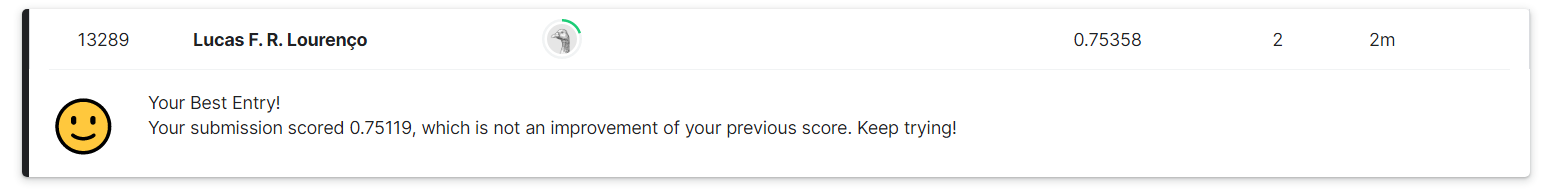

Com algumas análises ja feitas durante o a nossa Análise Exploratória podemos ressaltar algumas delas agora no final.
Nós começamos o nosso projeto exibindo dados que tinham no nosso conjunto, pegamos por exemplo o tamanho total dele, fizemos um resumo do nossos dados, e também verificamos se havia algum dado duplicado ou nulo no conjunto para que esses não pudessem interferir nas nossas análises e testes.

Fizemos uma análise inicial comparando os passageiros por sexo e idade para ver se a gente conseguia estabelecer algum padrão ou observar alguma correlação entre as características dos nossos passageiros.
Assim construimos alguns gráficos, que podemos tirar alguma conclusões, por exemplo nós vimos que a quantidade de sobreviventes do sexo feminino foi bem superior comparado ao sexo masculino. Também observamos graças aos nossos graficos de idade, que as crianças com a idade de 0 a 3 anos foram as que tiveram a taxa de maior sobrevivência junto com os passageiros do sexo feminino, e isso ressalva aquela famosa premisa "salve as mulheres e crianças primeiro".

Posteriormente fizemos algumas análises levando em conta o Pclass dos passageiros, e pudemos observar graficamente que a maioria das pessoas estavam na terceira classe, porém as pessoas que mais sobreviveram foram aquelas que estavam na primeira classe, tendo mais sobreviventes do que mortos.

Posteriormente fizemos um gráfico onde é possível ver a quantidade de passageiros e seu local de embarque. A maioria das pessoas embarcaram na cidade de Southampton, depois Cherbourg e por fim Queenstown, pelo nosso gráfico vimos também a quantidade de sobreviventes x não sobreviventes por local de embarque.

Fizemos algumas análises também pegando os dados do preço do ticket pagado pelos passageiros, chegamos a conclusão que a grande parte dos passageiros pagou por volta de 1 a 100 dólares, mas a maioria ali por volta de 1 a 30 dólares e foi nesse valor que teve a maior quantidade de sobreviventes, mas não a maior taxa de sobrevivência. A taxa de sobrevivência dos passageiros que pagaram pelo um ticket mais caro, foi considerávelmente maior do que aqueles que pagaram entre 1 a 50 doláres.


Depois de concluir a análise exploratória dos dados, avançamos para a etapa de aplicação de técnicas de machine learning para construir modelos preditivos. Inicialmente, dividimos o conjunto de dados em conjuntos de treinamento e teste, a fim de avaliar a capacidade de generalização dos modelos.

Utilizamos algoritimos como árvores de decisão, Floresta Aleátoria e Regressão Linear para prever a sobrevivência dos passageiros. Antes de aplicar os modelos, realizamos o pré-processamento dos dados, incluindo o tratamento de valores nulos.
Em seguida, ajustamos os modelos aos dados de treinamento e avaliamos seu desempenho utilizando métricas como acurácia, precisão e recall. Realizamos ajustes nos hiperparâmetros dos modelos, utilizando técnicas como validação cruzada, a fim de otimizar o desempenho e evitar o sobreajuste de dados.
Com isso testamos nossos modelos com alguns testes de accuracy e recall para vermos o desempenho deles.

Em resumo, a etapa de machine learning permitiu-nos construir modelos preditivos capazes de prever a sobrevivência dos passageiros do Titanic com base em suas características. A análise exploratória e o processo de modelagem são fundamentais para obter insights valiosos e criar soluções eficazes para problemas de previsão.
